In [814]:
import os
import sys
import pandas as pd
import numpy as np
import math
import statsmodels.api as sm
from scipy import stats
import seaborn
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
import re
import xlrd
import pathlib
from more_itertools import unique_everseen
from sklearn import linear_model, cross_validation, model_selection
from sklearn.metrics import *
from sklearn.decomposition import PCA, FactorAnalysis

In [840]:
root = pathlib.Path(os.path.join(os.path.join(os.path.expanduser('~')), 'Desktop') + "/SearchTool_Matches/")
cortdf = pd.read_excel(open(root / 'Cortisol/Cortisol_Analysis.xlsx',"rb"), index_col=False)
cortdf['Log Mean (µg/dL)'] = [math.log(y,10) for y in cortdf['Mean (µg/dL)']]
cortsubslist = list(unique_everseen(cortdf['Record ID'].astype(int)))
cortsubslist.sort()

In [843]:
msceitlisttemp = [root / 'MSCEIT/' / x for x in os.listdir(root / 'MSCEIT/') if any("PREEMPT1_%04d" % y in x for y in cortsubslist)]
eqilisttemp = [root / 'EQI2/' / x for x in os.listdir(root / 'EQI2/') if any("PREEMPT1_%04d" % y in x for y in cortsubslist)]
templist = [msceitlisttemp, eqilisttemp]
assessmentpathlist = []

for i, x in enumerate(templist):
    assessmentpathlist.append([])
    for y in cortsubslist:
        for z in x:
            if ("%04d" % y) in z.name:
                assessmentpathlist[i].append([y, z])

msceittotallist = []
msceitexparealist = []
msceitstratarealist = []
msceitpercbranchlist = []
msceitusingbranchlist = []
msceitunderbranchlist = []
msceitmanagebranchlist = []
eqitotallist = []; eqisplist = []; eqisrlist = []; eqisalist = []; eqieslist = []; eqiselist = []; eqieelist = []; eqiaslist = []; eqiinlist = []; eqiislist = []; eqiirlist = []; eqiemlist = []; eqirelist = []; eqidmlist = []; eqipslist = []; eqirtlist = []; eqiiclist = []; eqiiclist = []; eqismlist = []; eqifllist = []; eqistlist = []; eqioplist = []; eqihalist = []
age = []; gender = []
deletelist = []

deletelist.append([])
for i, x in enumerate(assessmentpathlist[0]):
    try:
        wb = xlrd.open_workbook(x[1], logfile=open(os.devnull, 'w')) 
        temp = pd.read_excel(wb, sheet_name='MSCEIT_Demographic_and_Scores', engine='xlrd')
        msceittotallist.append([x[0], temp['SS_TOT'][0]]) #0
        msceitexparealist.append([x[0], temp['SS_EXP'][0]]) #1
        msceitstratarealist.append([x[0], temp['SS_REA'][0]]) #2
        msceitpercbranchlist.append([x[0], temp['SS_B1'][0]]) #3
        msceitusingbranchlist.append([x[0], temp['SS_B2'][0]]) #4
        msceitunderbranchlist.append([x[0], temp['SS_B3'][0]]) #5
        msceitmanagebranchlist.append([x[0], temp['SS_B4'][0]]) #6
        age.append([x[0], temp['Age'][0]])
        gender.append([x[0], temp['Gender'][0]])
    except:
        deletelist[0].append(i)
for x in deletelist[0]:
    assessmentpathlist[0].pop(x)
    print(x)
    
deletelist.append([])
for i, x in enumerate(assessmentpathlist[1]):
    try:
        wb = xlrd.open_workbook(x[1], logfile=open(os.devnull, 'w'))
        temp = pd.read_excel(wb, sheet_name='EQ_i_2.0_Scores', engine='xlrd')
        eqitotallist.append([x[0], temp['TOT_T'][0]]) #0
        eqisplist.append([x[0], temp['SP_T'][0]]) #1
        eqisrlist.append([x[0], temp['SR_T'][0]]) #2
        eqisalist.append([x[0], temp['SA_T'][0]]) #3
        eqieslist.append([x[0], temp['ES_T'][0]]) #4
        eqiselist.append([x[0], temp['SE_T'][0]]) #5
        eqieelist.append([x[0], temp['EE_T'][0]]) #6
        eqiaslist.append([x[0], temp['AS_T'][0]]) #7
        eqiinlist.append([x[0], temp['IN_T'][0]]) #8
        eqiislist.append([x[0], temp['IS_T'][0]]) #9
        eqiirlist.append([x[0], temp['IR_T'][0]]) #10
        eqiemlist.append([x[0], temp['EM_T'][0]]) #11
        eqirelist.append([x[0], temp['RE_T'][0]]) #12
        eqidmlist.append([x[0], temp['DM_T'][0]]) #13
        eqipslist.append([x[0], temp['PS_T'][0]]) #14
        eqirtlist.append([x[0], temp['RT_T'][0]]) #15
        eqiiclist.append([x[0], temp['IC_T'][0]]) #16
        eqismlist.append([x[0], temp['SM_T'][0]]) #17
        eqifllist.append([x[0], temp['FL_T'][0]]) #18
        eqistlist.append([x[0], temp['ST_T'][0]]) #19
        eqioplist.append([x[0], temp['OP_T'][0]]) #20
        eqihalist.append([x[0], temp['HA_T'][0]]) #21
    except:
        deletelist[1].append(i)
for x in deletelist[1]:
    assessmentpathlist[0].pop(x)

msceitlistlist = [msceittotallist, msceitexparealist, msceitstratarealist, msceitpercbranchlist, msceitusingbranchlist, msceitunderbranchlist, msceitmanagebranchlist]
eqilistlist = [eqitotallist,eqisplist,eqisrlist,eqisalist,eqieslist,eqiselist,eqieelist,eqiaslist,eqiinlist,eqiislist,eqiirlist,eqiemlist,eqirelist,eqidmlist,eqipslist,eqirtlist,eqiiclist,eqismlist,eqifllist,eqistlist,eqioplist,eqihalist]
other = [age, gender]



0


In [846]:
assessmentlist = [msceitlistlist,eqilistlist]
deletelist = []
for i, w in enumerate(assessmentlist): #for a specific assessment group
    deletelist.append([])
    for j, x in enumerate(w): #for a specific subscale of an assessment group i.e., msceitmanagebranchlist
        deletelist[i].append([])
        inddelete = []
        for k, z in enumerate([y[1] for y in x]): #for a score, not index, of a subject in the subscale list
            if ((z > np.mean([y[1] for y in x]) + 3*np.std([y[1] for y in x])) or z < np.mean([y[1] for y in x]) - 3*np.std([y[1] for y in x])):
                inddelete.append(k)
        deletelist[i][j] = inddelete
        for x in deletelist[i][j]:
            assessmentlist[i][j].pop(x)

In [460]:
cortpoint1dif = 8
cortpoint2dif = 9
assessmentcortpairs=[]
for i, assessmentgroup in enumerate(range(len(assessmentlist))):
    assessmentcortpairs.append([])
    for assessmentsubscale in range(len(assessmentlist[assessmentgroup])):
        logcortlist = []
        deletelist = []
        diftrierlist = []
        for i, x in enumerate(assessmentlist[assessmentgroup][assessmentsubscale]):
            logcortlist.append([x[0]])
            try:
                for y in [cortpoint1dif, cortpoint2dif]: 
                    logcortlist[i].append(cortdf.loc[(cortdf['Record ID'] == int(x[0])) & (cortdf['General Time'] == y), 'Log Mean (µg/dL)'].iloc[0])
            except:
                deletelist.append(i)
        assessmentvar = assessmentlist[assessmentgroup][assessmentsubscale]
        for x in deletelist:
            logcortlist.pop(x)
            assessmentvar.pop(x)
        diftrierlist = [i-j for i,j in zip([x[2] for x in logcortlist],[x[1] for x in logcortlist])]
        diftrierlistz = list(stats.mstats.zscore(diftrierlist))
        assessmentcortpairs[assessmentgroup].append([[x[0] for x in assessmentvar], [x[1] for x in assessmentvar], diftrierlist])
        
        

//anaconda/envs/py35/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


r = 0.4747984801202374, p = 0.0011279822213663476


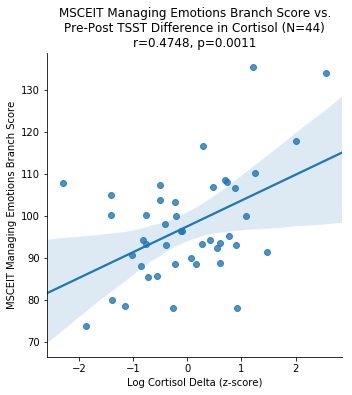

In [603]:
assessmentgroup = 0
assessmentsubscale = 6

#Edit These
SAVE = False
var1 = list(stats.mstats.zscore(assessmentcortpairs[assessmentgroup][assessmentsubscale][2]))
var2 = assessmentcortpairs[assessmentgroup][assessmentsubscale][1]
var1label = "Log Cortisol Delta (z-score)"
var2label = "MSCEIT Managing Emotions Branch Score"
title = "MSCEIT Managing Emotions Branch Score vs.\nPre-Post TSST Difference in Cortisol (N=%s)" % len(var1)
savename = "Analyses\\MSCEIT\\MSCEITManage-TSSTStress.pdf"

#--------------------------------------------
table = pd.DataFrame(
    {var1label: var1,
    var2label: var2
    })
for x in table.columns:
    table = table[np.isfinite(table[x])]

lm = seaborn.lmplot(x=var1label, y=var2label, palette=('r'), data=table, legend_out=False)
ax = plt.gca()
ax.set_title("%s\nr=%.4f, p=%.4f" % (title,pearsonr(table[var1label],table[var2label])[0],pearsonr(table[var1label],table[var2label])[1]))
print("r = %s, p = %s" % pearsonr(table[var1label],table[var2label]))
if SAVE == True:
    lm.savefig(root / savename, bbox_inches='tight')

In [625]:
chosenassessments = [0,1]



msceitcols = ['MSCEIT_TOT', 'MSCEIT_EXP', 'MSCEIT_STRAT', 'MSCEIT_PERC', 'MSCEIT_USE', 'MSCEIT_UNDER', 'MSCEIT_MANAGE']
eqicols = ['EQI_TOT', 'EQI_SP', 'EQI_SR', 'EQI_SA', 'EQI_ES', 'EQI_SE', 'EQI_EE', 'EQI_AS', 'EQI_IN', 'EQI_IS', 'EQI_IR', 'EQI_EM', 'EQI_RE', 'EQI_DM', 'EQI_PS', 'EQI_RT', 'EQI_IC', 'EQI_SM', 'EQI_FL', 'EQI_ST', 'EQI_OP', 'EQI_HA']
cols = [msceitcols, eqicols]
chosencols = []
for x in chosenassessments:
    chosencols = chosencols + cols[x]

regressionlist = assessmentcortpairs
ms = []
table = []
for mssubs in chosenassessments:
    ms = ms + [x[0] for x in assessmentcortpairs[mssubs]]
setlist = ms
intersectlist = list(set(setlist[0]).intersection(*setlist))
for h in chosenassessments:
    for i, y in enumerate([x[0] for x in assessmentcortpairs[h]]):
        for j, z in enumerate(y):
            if z not in intersectlist:
                for k, x in enumerate(regressionlist[h][i]):
                    regressionlist[h][i][k].pop(j)
    table = table + [x[1] for x in regressionlist[h]]
clf = linear_model.LinearRegression()
df = pd.DataFrame(table).T
df.columns = chosencols
for x in range(len(df.columns)):
    df.iloc[:,x] = list(stats.mstats.zscore(df.iloc[:,x]))

In [804]:
#.iloc[:,[0,4,5,8,12]]
testingset = principalDf.iloc[:,[0,4,5,8,12,17,3,15,10]]
testingset = sm.add_constant(testingset)
target = list(stats.mstats.zscore(regressionlist[0][0][2]))
model = sm.OLS(target, testingset).fit()
predictions = model.predict(testingset)
model.summary()
#plt.scatter(target, model.predict(testingset))
#print("r = %f, p = %f" % pearsonr(target,model.predict(testingset)))



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     4.003
Date:                Sun, 05 Aug 2018   Prob (F-statistic):            0.00146
Time:                        21:38:15   Log-Likelihood:                -46.538
No. Observations:                  44   AIC:                             113.1
Df Residuals:                      34   BIC:                             130.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.163e-17      0.119   3.48e-16      1.000      -0.243       0.243
0              0.0799      0.036      2.222      0.033       0.007       0.153
4             -0.2025      0.086     -2.362      0.024      -0.377      -0.028
5              0.2150      0.094      2.292      0.028       0.024       0.406
8             -0.4418      0.147     -3.000      0.005      -0.741      -0.143
12             0.3485      0.190      1.832      0.076      -0.038       0.735
17             0.5704      0.349      1.635      0.111      -0.139       1.279
3              0.1186      0.085      1.393      0.173      -0.054       0.292
15             0.3391      0.248      1.367      0.181      -0.165       0.843
10            -0.2001      0.168     -1.189      0.243      -0.542       0.142
==============================================================================
Omnibus:                        1.754   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.416   Jarque-Bera (JB):                1.151
Skew:                          -0.004   Prob(JB):                        0.562
Kurtosis:                       2.208   Cond. No.                         9.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[1.0590259308659227, 1.0173031630303377, 1.0766046441353188, 1.1272223845966347, 1.1780671346039788, 1.1123124703368352, 1.0485223339502756, 1.048350969268368, 1.0830142900780513, 0.9656569415282021, 1.066856259484718, 1.089227652424503, 1.1622592561117542, 1.1913453729177248, 1.2422672483545179, 1.2503490518423777, 1.2734318334616144, 1.4886162871755662, 1.4885519846037876, 1.5255934131483981, 1.6378274703665814, 2.0336564021332837, 2.1387710380592138, 2.510323996214288]


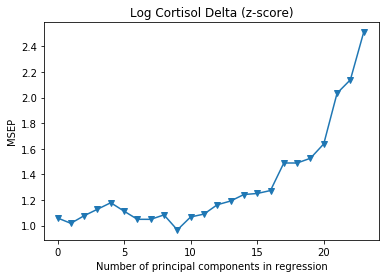

In [812]:
type = 'neg_mean_squared_error'
#type = 'r2'

n = len(principalComponents)
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)
lm = linear_model.LinearRegression()
msep=[]

score = -1*model_selection.cross_val_score(lm, np.ones((n,1)), target, cv=kf_10, scoring=type).mean()
msep.append(score)

for i in np.arange(1, 24):
    score = -1*model_selection.cross_val_score(lm, principalComponents[:,:i], target, cv=kf_10, scoring=type).mean()
    msep.append(score)
    
print(msep)
    
plt.plot(msep, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSEP')
plt.title('Log Cortisol Delta (z-score)')
plt.xlim(xmin=-1);

In [832]:
pca = PCA(n_components='mle')
pca.fit_transform(df)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents)
factorload = pd.DataFrame(pca.components_, columns=chosencols)
factorload.iloc[8,]




MSCEIT_TOT      -0.009310
MSCEIT_EXP       0.143658
MSCEIT_STRAT    -0.145919
MSCEIT_PERC     -0.202381
MSCEIT_USE       0.323668
MSCEIT_UNDER    -0.116371
MSCEIT_MANAGE   -0.169410
EQI_TOT         -0.019593
EQI_SP          -0.216534
EQI_SR          -0.332383
EQI_SA           0.013647
EQI_ES          -0.134222
EQI_SE          -0.003197
EQI_EE           0.188650
EQI_AS          -0.165428
EQI_IN          -0.080629
EQI_IS          -0.155954
EQI_IR          -0.111146
EQI_EM          -0.377539
EQI_RE           0.261172
EQI_DM           0.059117
EQI_PS           0.148539
EQI_RT           0.204387
EQI_IC          -0.128452
EQI_SM           0.222398
EQI_FL           0.020672
EQI_ST           0.358445
EQI_OP           0.097202
EQI_HA          -0.074375
Name: 8, dtype: float64

//anaconda/envs/py35/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


r = -0.35854990129487363, p = 0.01685075280781924


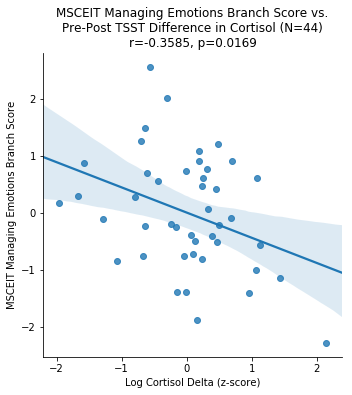

In [794]:
#Edit These
SAVE = False
var1 = principalDf.iloc[:,8]
var2 = list(stats.mstats.zscore(regressionlist[0][0][2]))
var1label = "Log Cortisol Delta (z-score)"
var2label = "MSCEIT Managing Emotions Branch Score"
title = "MSCEIT Managing Emotions Branch Score vs.\nPre-Post TSST Difference in Cortisol (N=%s)" % len(var1)
savename = "Analyses\\MSCEIT\\MSCEITManage-TSSTStress.pdf"

#--------------------------------------------
table = pd.DataFrame(
    {var1label: var1,
    var2label: var2
    })
for x in table.columns:
    table = table[np.isfinite(table[x])]

lm = seaborn.lmplot(x=var1label, y=var2label, palette=('r'), data=table, legend_out=False)
ax = plt.gca()
ax.set_title("%s\nr=%.4f, p=%.4f" % (title,pearsonr(table[var1label],table[var2label])[0],pearsonr(table[var1label],table[var2label])[1]))
print("r = %s, p = %s" % pearsonr(table[var1label],table[var2label]))
if SAVE == True:
    lm.savefig(root / savename, bbox_inches='tight')

Text(0.5,0,'Log Cortisol Delta (z-score)')

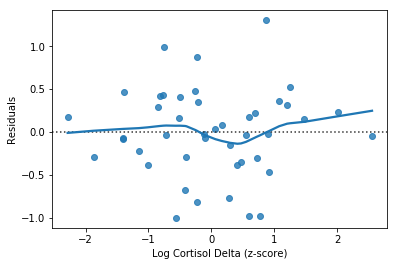

In [798]:
seaborn.residplot(target, model.predict(testingset), lowess=True)
ax = plt.gca()
ax.set_ylabel("Residuals")
ax.set_xlabel("Log Cortisol Delta (z-score)")

In [835]:
cov_mat = np.cov(df)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
#for ev in eig_vecs:
#    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [851]:
len(intersectlist)

44

In [872]:

genderlist = []
for x in other[1]:
    if x[0] in intersectlist:
        genderlist.append(x[1])

In [874]:
genderlist.count('F')

30

In [855]:
other[1]

[[13, 'F'],
 [19, 'M'],
 [32, 'F'],
 [35, 'F'],
 [40, 'M'],
 [42, 'F'],
 [49, 'F'],
 [50, 'M'],
 [51, 'F'],
 [61, 'M'],
 [62, 'F'],
 [64, 'M'],
 [68, 'F'],
 [73, 'F'],
 [79, 'F'],
 [84, 'M'],
 [100, 'F'],
 [126, 'M'],
 [127, 'F'],
 [149, 'M'],
 [153, 'M'],
 [165, 'F'],
 [168, 'F'],
 [170, 'F'],
 [172, 'M'],
 [178, 'F'],
 [181, 'F'],
 [185, 'M'],
 [193, 'F'],
 [199, 'F'],
 [203, 'F'],
 [206, 'F'],
 [214, 'M'],
 [233, 'F'],
 [237, 'F'],
 [260, 'F'],
 [262, 'F'],
 [263, 'F'],
 [271, 'M'],
 [274, 'F'],
 [290, 'M'],
 [291, 'F'],
 [311, 'F'],
 [319, 'F'],
 [325, 'M'],
 [326, 'F'],
 [330, 'M'],
 [344, 'F'],
 [346, 'F']]